In [28]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Import Dataset

In [29]:
df_api = pd.read_csv("../db/cdv/cordova_API_xml.csv")
df_plugin_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_DECLARATION_xml.csv")
df_plugin_permission_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_PERMISSION_DECLARATION_xml.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [30]:
df_api.columns

Index(['apk_name', 'battery-status', 'camera', 'contacts', 'device', 'dialogs',
       'file', 'geolocation', 'globalization', 'inappbrowser', 'media',
       'media-capture', 'network-information', 'splashscreen', 'statusbar',
       'vibration'],
      dtype='object')

In [31]:
l_api = list(df_api.columns)
l_api

['apk_name',
 'battery-status',
 'camera',
 'contacts',
 'device',
 'dialogs',
 'file',
 'geolocation',
 'globalization',
 'inappbrowser',
 'media',
 'media-capture',
 'network-information',
 'splashscreen',
 'statusbar',
 'vibration']

In [32]:
df_api

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,1,5,0,0,2,1,7,0,0,0,2,0,0,0,0,0
1,10,5,0,0,1,0,7,1,0,0,2,0,1,0,0,0
2,100,5,0,0,29,15,7,1,0,0,3,0,1,0,0,0
3,101,5,6,1,6,2,5,2,0,0,2,3,0,0,0,0
4,102,5,1,1,58,2,8,1,1,0,2,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2655,za.co.snapplify.garfield,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2656,za.co.snapplify.lowveldliving,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2657,za.co.snapplify.purpleturtle,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0


In [6]:
df_plugin_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,10,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0
2,100,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0
3,101,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0
4,102,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,za.co.snapplify.completecookery,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0
2569,za.co.snapplify.garfield,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0
2570,za.co.snapplify.lowveldliving,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0
2571,za.co.snapplify.purpleturtle,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0


In [7]:
df_plugin_permission_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0
1,10,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
2,100,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1
3,101,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0
4,102,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,za.co.snapplify.completecookery,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1
2569,za.co.snapplify.garfield,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1
2570,za.co.snapplify.lowveldliving,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1
2571,za.co.snapplify.purpleturtle,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1


# Analyse API calls

## The occurances

### The occurances of funcitons detected for each plugin in each APK

In [8]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,5,0,0,2,1,7,0,0,0,2,0,0,0,0,0
1,5,0,0,1,0,7,1,0,0,2,0,1,0,0,0
2,5,0,0,29,15,7,1,0,0,3,0,1,0,0,0
3,5,6,1,6,2,5,2,0,0,2,3,0,0,0,0
4,5,1,1,58,2,8,1,1,0,2,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2569,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2570,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2571,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0


### The occurance of plugins for entire dataset

In [9]:
total_apk = df_plugins_only.shape[0]
print(f"Total APKs: {total_apk}")
df_cnt = df_plugins_only.astype(bool).sum(axis=0).sort_values(ascending=True)
df_cnt

Total APKs: 2573


vibration                22
inappbrowser            256
statusbar               284
globalization           787
media-capture           862
contacts                925
splashscreen           1150
camera                 1311
network-information    1425
geolocation            1664
dialogs                1901
battery-status         1970
media                  2054
file                   2218
device                 2558
dtype: int64

In [10]:
# percentage of apks using each plugin
df_pct = df_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_pct

vibration               0.86
inappbrowser            9.95
statusbar              11.04
globalization          30.59
media-capture          33.50
contacts               35.95
splashscreen           44.69
camera                 50.95
network-information    55.38
geolocation            64.67
dialogs                73.88
battery-status         76.56
media                  79.83
file                   86.20
device                 99.42
dtype: float64

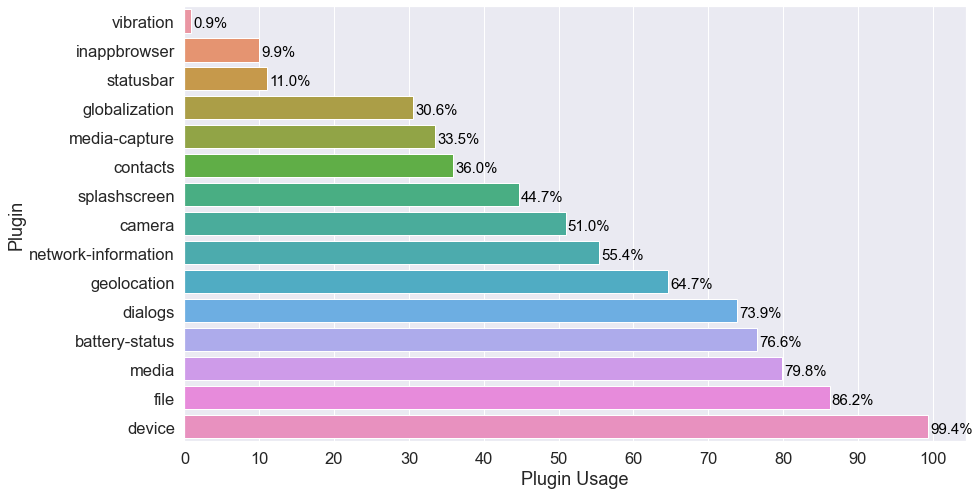

In [11]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_pct.values, y=df_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Usage")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugins declaration

In [12]:
df_plugin_declaration_only = df_plugin_declaration.drop(columns=["apk_name"])
df_plugin_dc = df_plugin_declaration_only
total_apk = df_plugin_dc.shape[0]
print(f"Total APKs: {total_apk}")
df_plugin_dc_cnt = df_plugin_dc.astype(bool).sum(axis=0).sort_values(ascending=True)
df_plugin_dc_cnt

Total APKs: 2573


statusbar               100
vibration               313
globalization           953
inappbrowser           1206
battery-status         1731
contacts               1767
media-capture          1813
geolocation            1929
media                  1939
splashscreen           1956
camera                 2065
network-information    2069
file                   2172
dialogs                2284
device                 2385
dtype: int64

In [13]:
# percentage of apks using each plugin
df_plugin_dc_pct = df_plugin_dc_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_plugin_dc_pct

statusbar               3.89
vibration              12.16
globalization          37.04
inappbrowser           46.87
battery-status         67.28
contacts               68.67
media-capture          70.46
geolocation            74.97
media                  75.36
splashscreen           76.02
camera                 80.26
network-information    80.41
file                   84.42
dialogs                88.77
device                 92.69
dtype: float64

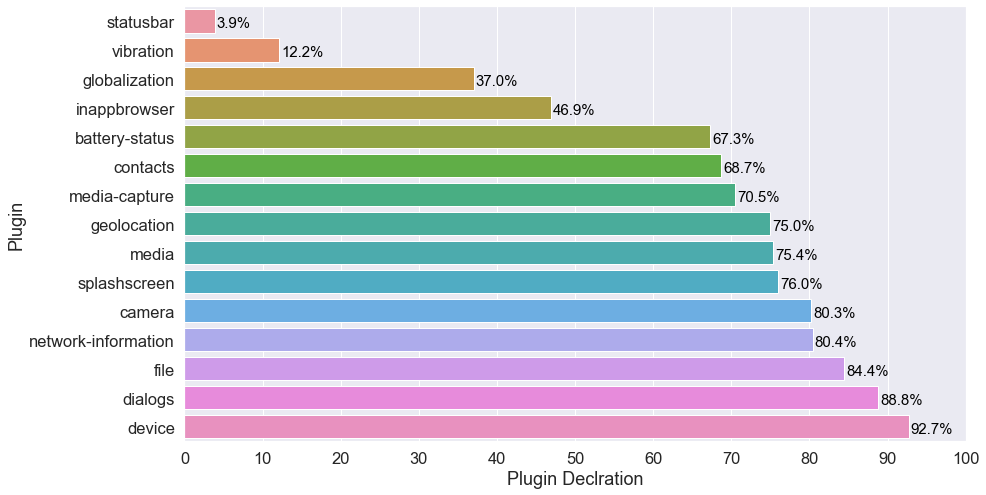

In [14]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_plugin_dc_pct.values, y=df_plugin_dc_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Declration")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugins permission

In [15]:
df_plugin_permission_declaration_only = df_plugin_permission_declaration.drop(columns=["apk_name"])
df_plugin_permission_dc = df_plugin_permission_declaration_only
total_apk = df_plugin_permission_dc.shape[0]
print(f"Total APKs: {total_apk}")
df_plugin_permission_dc_cnt = df_plugin_permission_dc.astype(bool).sum(axis=0).sort_values(ascending=True)
df_plugin_permission_dc_cnt

Total APKs: 2573


media-capture             6
media                   301
contacts                353
vibration               930
camera                 1389
file                   1389
geolocation            1544
network-information    2420
battery-status         2573
device                 2573
dialogs                2573
globalization          2573
inappbrowser           2573
splashscreen           2573
statusbar              2573
dtype: int64

In [16]:
# percentage of apks using each plugin
df_plugin_permission_dc_pct = df_plugin_permission_dc_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_plugin_permission_dc_pct

media-capture            0.23
media                   11.70
contacts                13.72
vibration               36.14
camera                  53.98
file                    53.98
geolocation             60.01
network-information     94.05
battery-status         100.00
device                 100.00
dialogs                100.00
globalization          100.00
inappbrowser           100.00
splashscreen           100.00
statusbar              100.00
dtype: float64

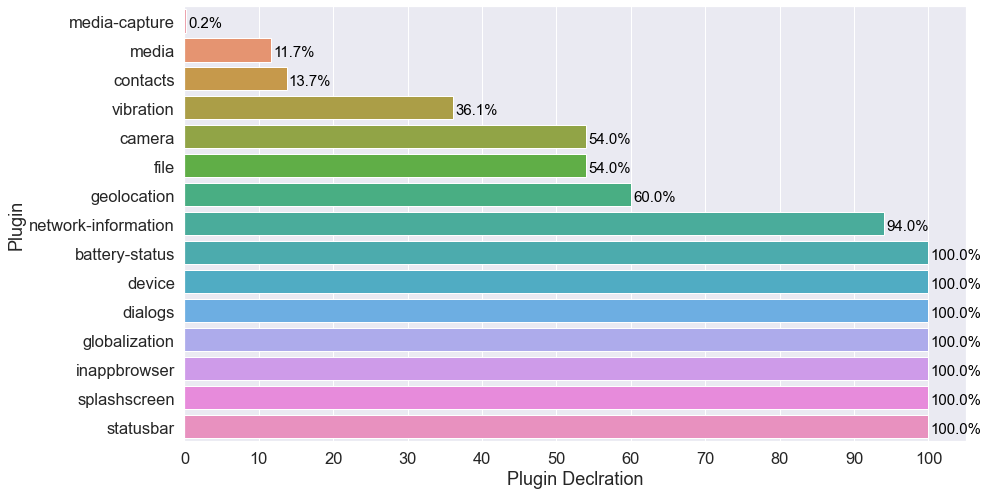

In [17]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_plugin_permission_dc_pct.values, y=df_plugin_permission_dc_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Declration")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugin Uages VS. Plugin Dclaration

In [18]:
df_usage_cnt = df_plugins_only.astype(bool).sum(axis=0)
df_usage_cnt = df_usage_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_declaration_cnt = df_plugin_dc.astype(bool).sum(axis=0)
df_declaration_cnt = df_declaration_cnt.apply(lambda x: round(x/total_apk*100, 2))
d_plugin = {"plugin": list(df_usage_cnt.axes)}
d_usage = {"usage": list(df_usage_cnt.values)}
d_declaration = {"usage": list(df_declaration_cnt.values)}
d_plugin_vs = {
    "plugin": list(df_plugins_only.columns),
    "usage": list(df_usage_cnt.values),
    "declaration": list(df_declaration_cnt.values)
}
# print(d_plugin_vs)
df_plugin_vs = pd.DataFrame(data=d_plugin_vs)
df_plugin_vs

,plugin,usage,declaration
0,battery-status,76.56,67.28
1,camera,50.95,80.26
2,contacts,35.95,68.67
3,device,99.42,92.69
4,dialogs,73.88,88.77
5,file,86.20,84.42
6,geolocation,64.67,74.97
7,globalization,30.59,37.04
8,inappbrowser,9.95,46.87
9,media,79.83,75.36


In [19]:
# order by value in declaration
df_plugin_vs_order = df_plugin_vs.sort_values(by=['declaration'])
df_plugin_vs_order

,plugin,usage,declaration
13,statusbar,11.04,3.89
14,vibration,0.86,12.16
7,globalization,30.59,37.04
8,inappbrowser,9.95,46.87
0,battery-status,76.56,67.28
2,contacts,35.95,68.67
10,media-capture,33.50,70.46
6,geolocation,64.67,74.97
9,media,79.83,75.36
12,splashscreen,44.69,76.02


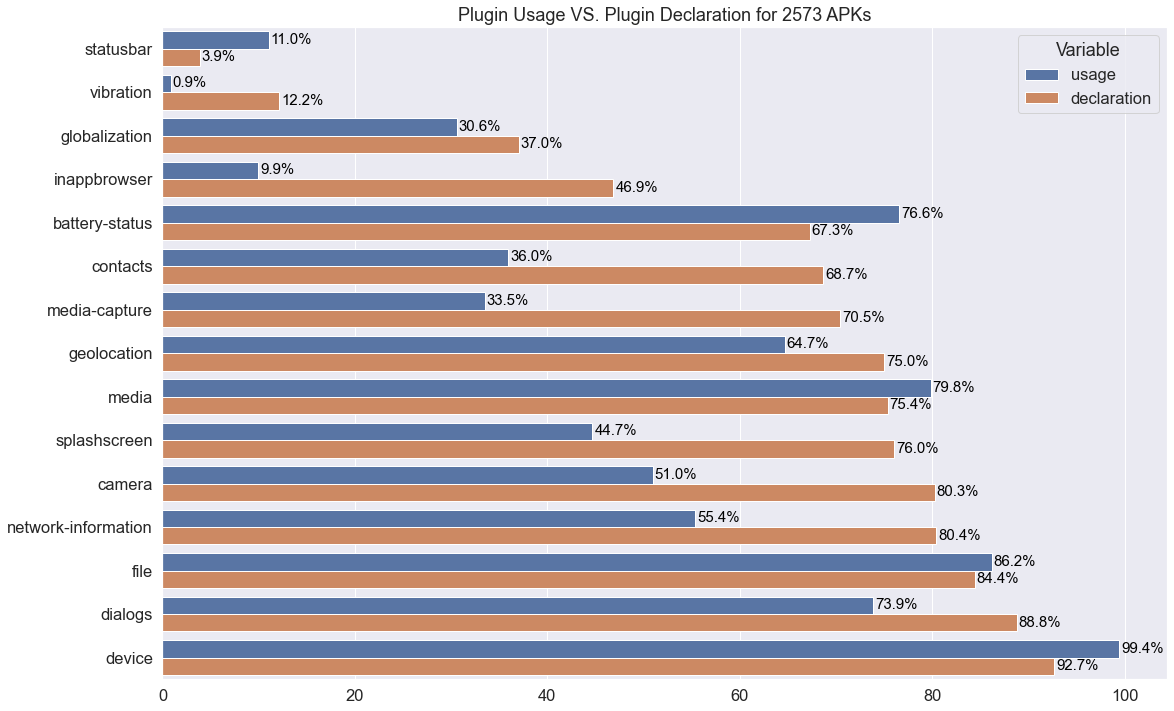

In [20]:
# ax = sns.barplot(x="Percentage", y="Plugin", hue="plugin", data=df_plugin_vs_order)
fig, ax1 = plt.subplots(figsize=(18, 12))
tidy = df_plugin_vs_order.melt(id_vars='plugin').rename(columns=str.title)
# print(tidy)
sns_pct = sns.barplot(x='Value', y='Plugin', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')
plt.xlabel("")
plt.ylabel("")
plt.title(f'Plugin Usage VS. Plugin Declaration for {total_apk} APKs')
plt.show()

# Plugin Usage VS Plugin Declaration VS Plugin Permission Declaration

## Ingore plugins don't require any permission

In [21]:
df_usage_cnt = df_plugins_only.astype(bool).sum(axis=0)
df_usage_cnt = df_usage_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_declaration_cnt = df_plugin_dc.astype(bool).sum(axis=0)
df_declaration_cnt = df_declaration_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_permission_cnt = df_plugin_permission_dc.astype(bool).sum(axis=0)
df_permission_cnt = df_permission_cnt.apply(lambda x: round(x/total_apk*100, 2))
d_plugin = {"plugin": list(df_usage_cnt.axes)}
d_usage = {"usage": list(df_usage_cnt.values)}
d_declaration = {"usage": list(df_declaration_cnt.values)}
df_permission = {"usage": list(df_permission_cnt.values)}
d_plugin_vs = {
    "plugin": list(df_plugins_only.columns),
    "usage": list(df_usage_cnt.values),
    "declaration": list(df_declaration_cnt.values),
    "permission": list(df_permission_cnt.values),
}
# print(d_plugin_vs)
df_plugin_vs = pd.DataFrame(data=d_plugin_vs)
df_plugin_vs

,plugin,usage,declaration,permission
0,battery-status,76.56,67.28,100.00
1,camera,50.95,80.26,53.98
2,contacts,35.95,68.67,13.72
3,device,99.42,92.69,100.00
4,dialogs,73.88,88.77,100.00
5,file,86.20,84.42,53.98
6,geolocation,64.67,74.97,60.01
7,globalization,30.59,37.04,100.00
8,inappbrowser,9.95,46.87,100.00
9,media,79.83,75.36,11.70


In [22]:
df_plugin_vs = df_plugin_vs.sort_values(by=['declaration'], ascending=True)
df_plugin_vs

,plugin,usage,declaration,permission
13,statusbar,11.04,3.89,100.00
14,vibration,0.86,12.16,36.14
7,globalization,30.59,37.04,100.00
8,inappbrowser,9.95,46.87,100.00
0,battery-status,76.56,67.28,100.00
2,contacts,35.95,68.67,13.72
10,media-capture,33.50,70.46,0.23
6,geolocation,64.67,74.97,60.01
9,media,79.83,75.36,11.70
12,splashscreen,44.69,76.02,100.00


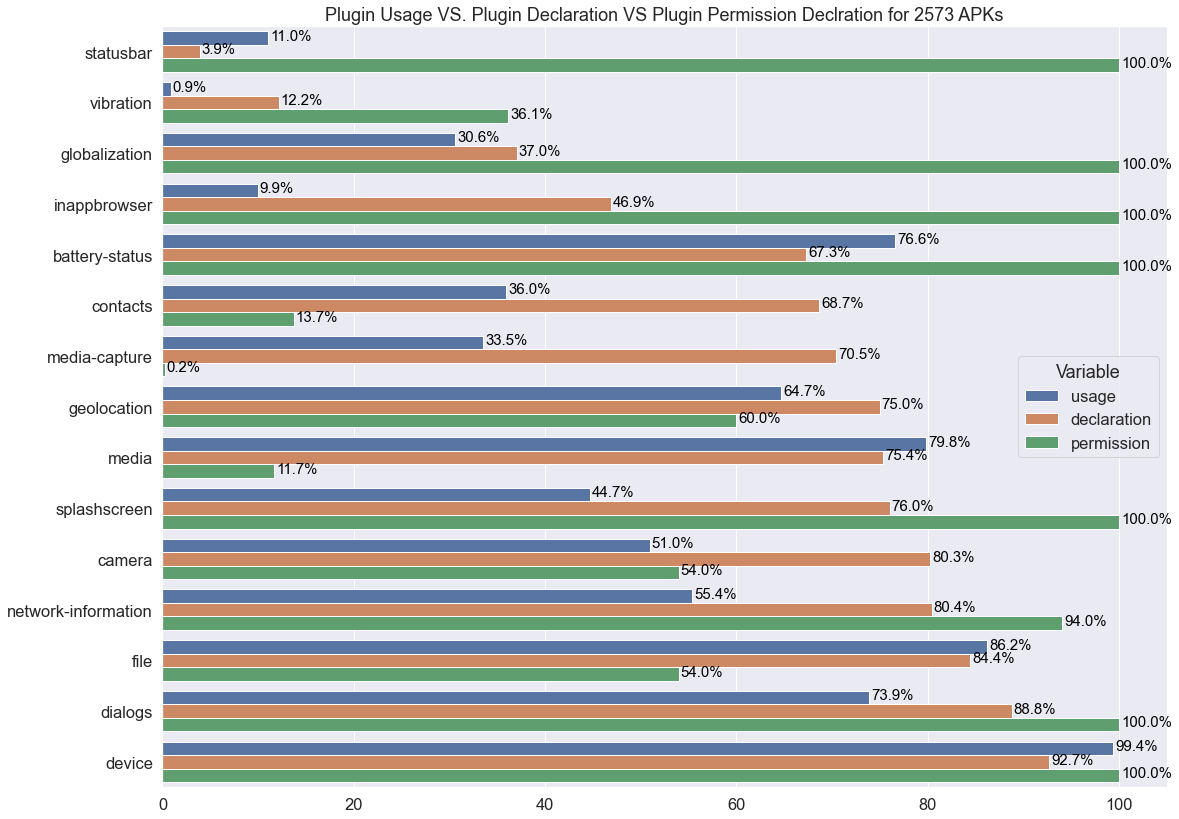

In [23]:
# ax = sns.barplot(x="Percentage", y="Plugin", hue="plugin", data=df_plugin_vs_order)
fig, ax1 = plt.subplots(figsize=(18, 14))
tidy = df_plugin_vs.melt(id_vars='plugin').rename(columns=str.title)
# print(tidy)
sns_pct = sns.barplot(x='Value', y='Plugin', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')
plt.xlabel("")
plt.ylabel("")
plt.title(f'Plugin Usage VS. Plugin Declaration VS Plugin Permission Declration for {total_apk} APKs')
plt.show()

## Ingore the plugins don't require any permission

In [24]:
from cdv_plugins import get_plugin_permission_require_l
l_plugins_require = get_plugin_permission_require_l()
l_plugins_require

['camera',
 'contacts',
 'file',
 'geolocation',
 'media',
 'media-capture',
 'network-information',
 'vibration']

In [25]:
update_df_plugin_vs = df_plugin_vs[df_plugin_vs["plugin"].isin(l_plugins_require)]
update_df_plugin_vs

,plugin,usage,declaration,permission
14,vibration,0.86,12.16,36.14
2,contacts,35.95,68.67,13.72
10,media-capture,33.50,70.46,0.23
6,geolocation,64.67,74.97,60.01
9,media,79.83,75.36,11.70
1,camera,50.95,80.26,53.98
11,network-information,55.38,80.41,94.05
5,file,86.20,84.42,53.98


In [26]:
update_df_plugin_vs = update_df_plugin_vs.sort_values(by=['declaration'], ascending=True)
update_df_plugin_vs

,plugin,usage,declaration,permission
14,vibration,0.86,12.16,36.14
2,contacts,35.95,68.67,13.72
10,media-capture,33.50,70.46,0.23
6,geolocation,64.67,74.97,60.01
9,media,79.83,75.36,11.70
1,camera,50.95,80.26,53.98
11,network-information,55.38,80.41,94.05
5,file,86.20,84.42,53.98


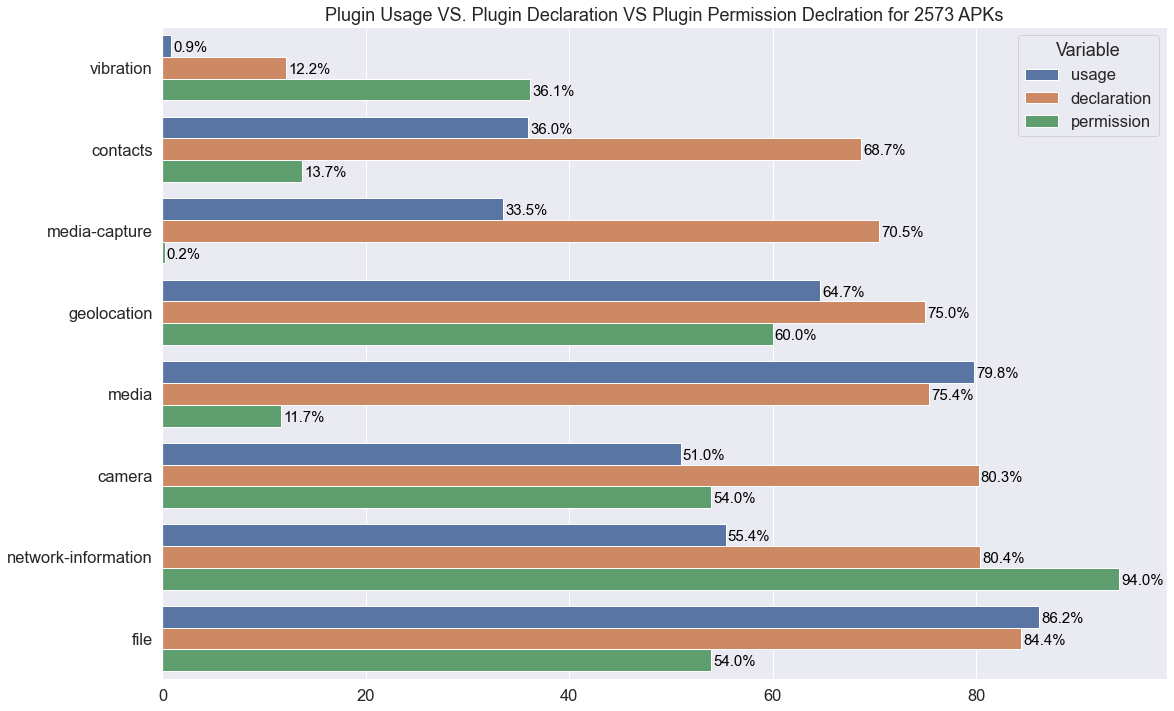

In [27]:
# ax = sns.barplot(x="Percentage", y="Plugin", hue="plugin", data=df_plugin_vs_order)
fig, ax1 = plt.subplots(figsize=(18, 12))
tidy = update_df_plugin_vs.melt(id_vars='plugin').rename(columns=str.title)
# print(tidy)
sns_pct = sns.barplot(x='Value', y='Plugin', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')
plt.xlabel("")
plt.ylabel("")
plt.title(f'Plugin Usage VS. Plugin Declaration VS Plugin Permission Declration for {total_apk} APKs')
plt.show()